In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [322]:
df = pd.read_csv('/content/drive/MyDrive/Compute_Tasks/Compute_Tasks/breast_cancer_survival.csv')

In [323]:
df.head(10)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
5,80,FEMALE,0.46647,2.57970,-1.253700,0.151540,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jun-18,16-Feb-19,Alive
6,66,FEMALE,-0.72486,-0.28289,0.959430,0.350900,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,27-Oct-18,19-Jun-19,Alive
7,36,FEMALE,0.46931,1.55260,-0.165240,-0.275990,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,19-Jul-18,30-Jun-19,Alive
8,58,FEMALE,-1.26850,0.10613,1.135200,-0.394920,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,15-Jun-18,16-Dec-19,Alive
9,62,FEMALE,0.64934,1.81680,0.279260,0.132280,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,20-Jun-19,NaN,NaN


In [324]:
df.columns

Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

In [326]:
df.duplicated().sum()

0

In [327]:
null_df = df[df['Patient_Status'].isna()]

In [328]:
null_df.head(13)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
9,62,FEMALE,0.649340,1.81680,0.279260,0.13228,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,20-Jun-19,NaN,NaN
18,46,FEMALE,-0.010999,0.86749,0.281570,-0.54588,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,10-Jun-19,NaN,NaN
60,56,FEMALE,-0.675420,0.26937,-0.086603,1.07140,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,23-Aug-19,NaN,NaN
188,44,FEMALE,-0.278840,2.16880,-0.462330,0.27220,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,20-Jan-18,NaN,NaN
200,55,FEMALE,0.330640,0.84757,-0.494660,0.11656,I,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,07-Nov-17,NaN,NaN
202,71,FEMALE,0.394090,1.70540,0.035642,1.44100,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,26-Nov-18,NaN,NaN
214,80,FEMALE,0.670770,-0.71039,0.186480,0.14664,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,14-Jun-19,NaN,NaN
229,88,FEMALE,-2.340900,0.37246,0.208450,-1.64110,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,04-Jun-19,NaN,NaN
230,60,FEMALE,0.532420,1.54110,-1.009500,-0.12588,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,11-Dec-17,NaN,NaN
231,50,FEMALE,-0.322890,0.98848,-0.293130,-0.26170,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,NaN,NaN


In [329]:
df.dropna(axis=0, inplace=True)

In [330]:
df.drop('Gender', axis=1, inplace=True)

In [331]:
df.head(10)

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
5,80,0.46647,2.57970,-1.253700,0.151540,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jun-18,16-Feb-19,Alive
6,66,-0.72486,-0.28289,0.959430,0.350900,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,27-Oct-18,19-Jun-19,Alive
7,36,0.46931,1.55260,-0.165240,-0.275990,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,19-Jul-18,30-Jun-19,Alive
8,58,-1.26850,0.10613,1.135200,-0.394920,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,15-Jun-18,16-Dec-19,Alive
10,51,-0.38466,0.80609,-1.627400,-0.512910,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,26-Nov-18,28-Dec-19,Alive


In [332]:
df[['Sr_Day', 'Sr_Month', 'Sr_Year']] = df['Date_of_Surgery'].str.split('-', expand=True)
df[['LV_Day', 'LV_Month', 'LV_Year']] = df['Date_of_Last_Visit'].str.split('-', expand=True)
df.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Sr_Day,Sr_Month,Sr_Year,LV_Day,LV_Month,LV_Year
0,42,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive,20,May,18,26,Aug,18
1,54,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead,26,Apr,18,25,Jan,19
2,63,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive,24,Aug,18,08,Apr,20
3,78,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive,16,Nov,18,28,Jul,20
4,42,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive,12,Dec,18,05,Jan,19


In [333]:
df.drop('Date_of_Surgery', axis=1, inplace=True)
df.drop('Date_of_Last_Visit', axis=1, inplace=True)
df.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,Sr_Day,Sr_Month,Sr_Year,LV_Day,LV_Month,LV_Year
0,42,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive,20,May,18,26,Aug,18
1,54,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead,26,Apr,18,25,Jan,19
2,63,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,Alive,24,Aug,18,08,Apr,20
3,78,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive,16,Nov,18,28,Jul,20
4,42,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,Alive,12,Dec,18,05,Jan,19


In [334]:
df['Histology'].unique()

array(['Infiltrating Ductal Carcinoma', 'Infiltrating Lobular Carcinoma',
       'Mucinous Carcinoma'], dtype=object)

In [335]:
df['Tumour_Stage'] = df['Tumour_Stage'].map({'I': 1, 'II': 2, 'III': 3})
df['ER status'] = df['ER status'].map({'Positive': 1, 'Negative': 0})
df['PR status'] = df['PR status'].map({'Positive': 1, 'Negative': 0})
df['HER2 status'] = df['HER2 status'].map({'Positive': 1, 'Negative': 0})
df['Patient_Status'] = df['Patient_Status'].map({'Alive': 1, 'Dead': 0})

In [336]:
le = LabelEncoder()

df['Surgery_type'] = le.fit_transform(df['Surgery_type'])
df['Histology'] = le.fit_transform(df['Histology'])

In [337]:
df.head(25)

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,Sr_Day,Sr_Month,Sr_Year,LV_Day,LV_Month,LV_Year
0,42,0.952560,2.15000,0.007972,-0.048340,2,0,1,1,0,2,1,20,May,18,26,Aug,18
1,54,0.000000,1.38020,-0.498030,-0.507320,2,0,1,1,0,2,0,26,Apr,18,25,Jan,19
2,63,-0.523030,1.76400,-0.370190,0.010815,2,0,1,1,0,0,1,24,Aug,18,08,Apr,20
3,78,-0.876180,0.12943,-0.370380,0.132190,1,0,1,1,0,2,1,16,Nov,18,28,Jul,20
4,42,0.226110,1.74910,-0.543970,-0.390210,2,0,1,1,1,0,1,12,Dec,18,05,Jan,19
5,80,0.466470,2.57970,-1.253700,0.151540,3,0,1,1,0,1,1,25,Jun,18,16,Feb,19
6,66,-0.724860,-0.28289,0.959430,0.350900,2,0,1,1,0,0,1,27,Oct,18,19,Jun,19
7,36,0.469310,1.55260,-0.165240,-0.275990,3,0,1,1,0,1,1,19,Jul,18,30,Jun,19
8,58,-1.268500,0.10613,1.135200,-0.394920,2,0,1,1,0,2,1,15,Jun,18,16,Dec,19
10,51,-0.384660,0.80609,-1.627400,-0.512910,2,0,1,1,1,1,1,26,Nov,18,28,Dec,19


<ipython-input-338-3e548b6129b2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Patient_Status'] == 1]['Protein1'])
<ipython-input-338-3e548b6129b2>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Patient_Status'] == 1]['Protein2'])
<ipython-input-338-3e548b6129b2>:10: UserWarni

<Axes: xlabel='Protein4', ylabel='Density'>

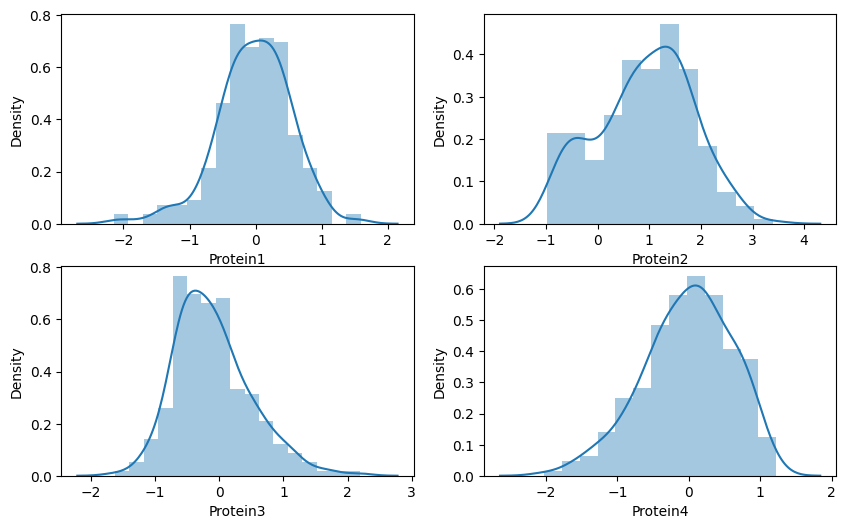

In [338]:
fig = plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
sns.distplot(df[df['Patient_Status'] == 1]['Protein1'])

plt.subplot(2,2,2)
sns.distplot(df[df['Patient_Status'] == 1]['Protein2'])

plt.subplot(2,2,3)
sns.distplot(df[df['Patient_Status'] == 1]['Protein3'])

plt.subplot(2,2,4)
sns.distplot(df[df['Patient_Status'] == 1]['Protein4'])

# Protein Values of Surviving Patients

The values of Protein1 majory lie in the range [-0.5,0.5]

The values of Protein2 majory lie in the range [0,2]

The values of Protein3 majory lie in the range [-1,0]

The values of Protein4 majory lie in the range [-1,1]

<ipython-input-339-056753f1d49d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Patient_Status'] == 0]['Protein1'])
<ipython-input-339-056753f1d49d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Patient_Status'] == 0]['Protein2'])
<ipython-input-339-056753f1d49d>:10: UserWarni

<Axes: xlabel='Protein4', ylabel='Density'>

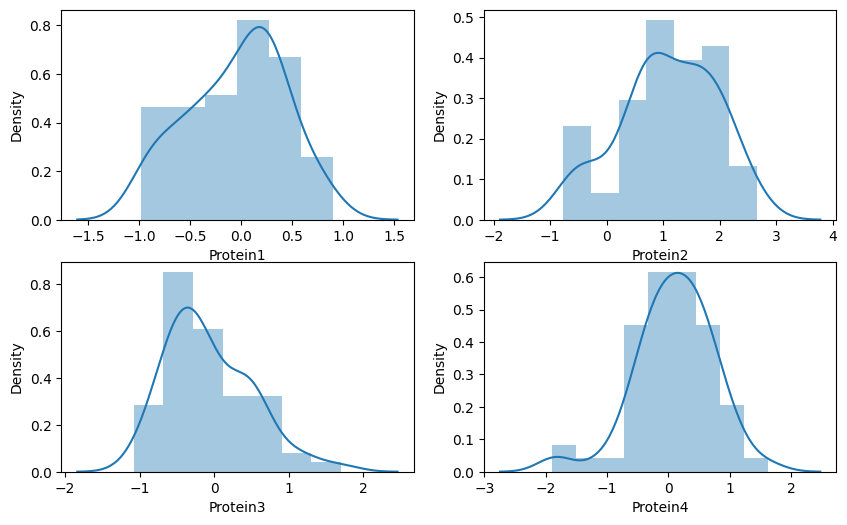

In [339]:
fig = plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
sns.distplot(df[df['Patient_Status'] == 0]['Protein1'])

plt.subplot(2,2,2)
sns.distplot(df[df['Patient_Status'] == 0]['Protein2'])

plt.subplot(2,2,3)
sns.distplot(df[df['Patient_Status'] == 0]['Protein3'])

plt.subplot(2,2,4)
sns.distplot(df[df['Patient_Status'] == 0]['Protein4'])

# Protein values of Dead Patients

The values of Protein1 majory lie in the range [-1,0.5]

The values of Protein2 majory lie in the range [0.5,2]

The values of Protein3 majory lie in the range [-0.5,0.5]

The values of Protein4 majory lie in the range [-0.5,0.5]

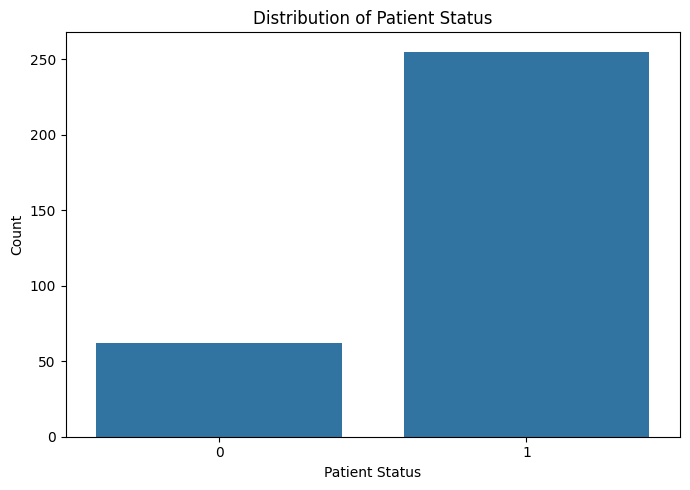

In [340]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Patient_Status', data=df)
plt.title('Distribution of Patient Status')
plt.xlabel('Patient Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

This graph shows that the number of women alive are much more than the ones that have died.

<Figure size 1000x600 with 0 Axes>

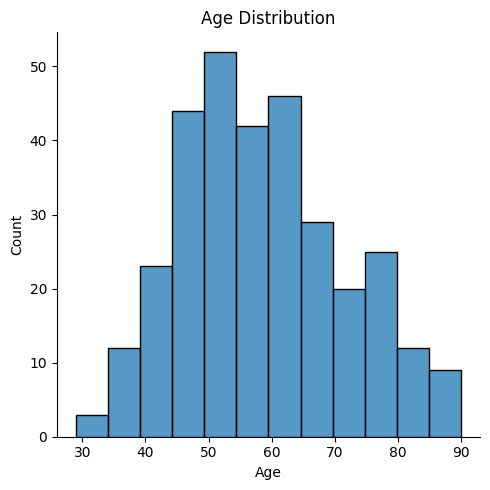

In [341]:
plt.figure(figsize=(10, 6))
sns.displot(x='Age', data=df)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

This graph tells us that the age of majority of women having breast cancer lies in the range of 45-65

<Axes: xlabel='Tumour_Stage', ylabel='count'>

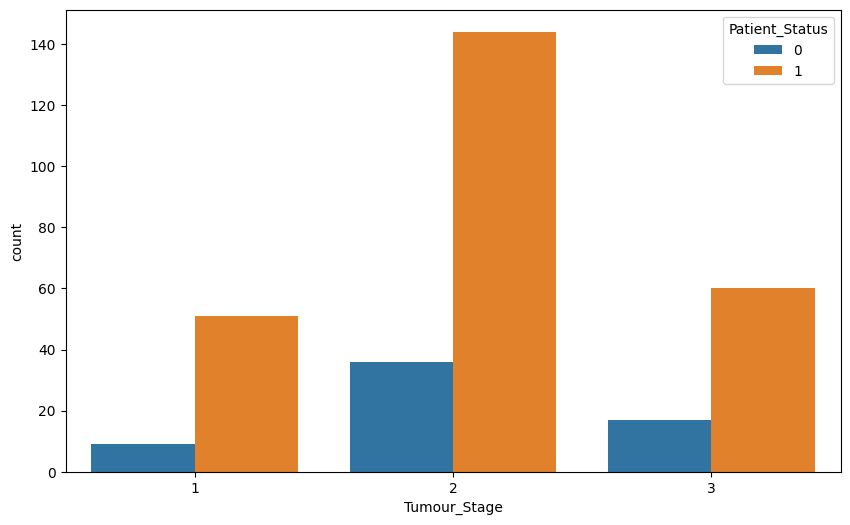

In [342]:
fig = plt.figure(figsize=(10,6))

sns.countplot(x='Tumour_Stage', hue='Patient_Status', data=df)

In [343]:
group = df.groupby(['Patient_Status', 'Tumour_Stage']).count()

In [344]:
group_alive = group.loc[1]  # groups all the rows in group having patient status as 1 i.e. Alive
group_dead = group.loc[0]  # groups all the rows in group having patient status as 0 i.e. Dead

ratio = group_alive/group_dead
print(ratio)

                   Age  Protein1  Protein2  Protein3  Protein4  Histology  \
Tumour_Stage                                                                
1             5.666667  5.666667  5.666667  5.666667  5.666667   5.666667   
2             4.000000  4.000000  4.000000  4.000000  4.000000   4.000000   
3             3.529412  3.529412  3.529412  3.529412  3.529412   3.529412   

              ER status  PR status  HER2 status  Surgery_type    Sr_Day  \
Tumour_Stage                                                              
1              5.666667   5.666667     5.666667      5.666667  5.666667   
2              4.000000   4.000000     4.000000      4.000000  4.000000   
3              3.529412   3.529412     3.529412      3.529412  3.529412   

              Sr_Month   Sr_Year    LV_Day  LV_Month   LV_Year  
Tumour_Stage                                                    
1             5.666667  5.666667  5.666667  5.666667  5.666667  
2             4.000000  4.000000  4.000000 

This ratio rightly tells that the chances of surviving decreases with higher the stage of cancer.

<Axes: xlabel='Histology', ylabel='count'>

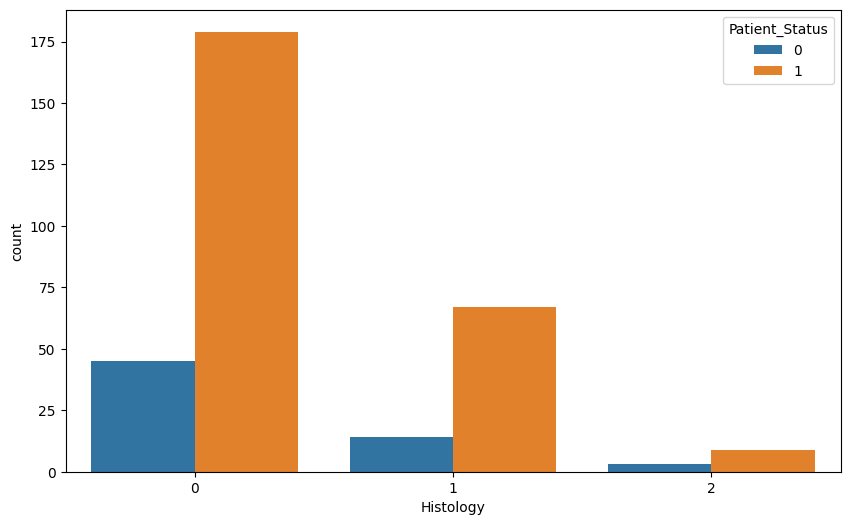

In [345]:
fig = plt.figure(figsize=(10,6))

sns.countplot(x='Histology', hue='Patient_Status', data=df)

In [346]:
group = df.groupby(['Patient_Status', 'Histology']).count()

In [347]:
group_alive = group.loc[1]  # groups all the rows in group having patient status as 1 i.e. Alive
group_dead = group.loc[0]  # groups all the rows in group having patient status as 0 i.e. Dead

ratio = group_alive/group_dead
print(ratio)

                Age  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
Histology                                                                   
0          3.977778  3.977778  3.977778  3.977778  3.977778      3.977778   
1          4.785714  4.785714  4.785714  4.785714  4.785714      4.785714   
2          3.000000  3.000000  3.000000  3.000000  3.000000      3.000000   

           ER status  PR status  HER2 status  Surgery_type    Sr_Day  \
Histology                                                              
0           3.977778   3.977778     3.977778      3.977778  3.977778   
1           4.785714   4.785714     4.785714      4.785714  4.785714   
2           3.000000   3.000000     3.000000      3.000000  3.000000   

           Sr_Month   Sr_Year    LV_Day  LV_Month   LV_Year  
Histology                                                    
0          3.977778  3.977778  3.977778  3.977778  3.977778  
1          4.785714  4.785714  4.785714  4.785714  4.785714  
2    

Survival Ratio:

Infiltrating Ductal Carcinoma - 3.978

Infiltrating Lobular Carcinoma - 4.786

Mucinous Carcinoma - 3

In [348]:
df['Sr_Year'].unique()

array(['18', '17', '19'], dtype=object)

<Axes: xlabel='Sr_Year', ylabel='count'>

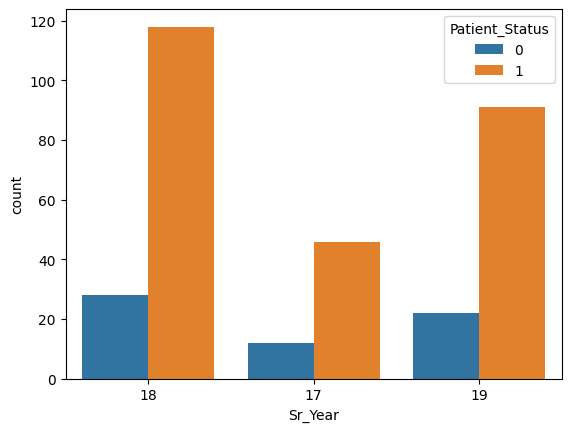

In [349]:
sns.countplot(x='Sr_Year', hue='Patient_Status', data=df)

In [350]:
required_attributes = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']

<function matplotlib.pyplot.show(close=None, block=None)>

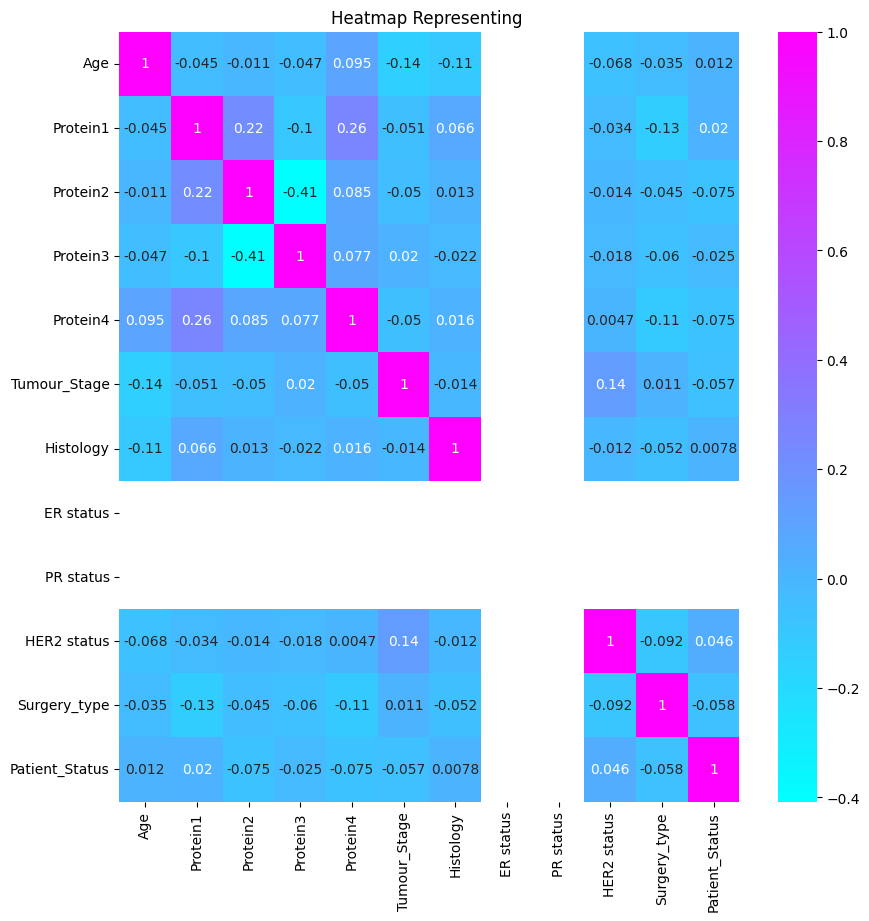

In [351]:
plt.figure(figsize=(10,10))
sns.heatmap(df[required_attributes + ['Patient_Status']].corr(), annot=True, cmap='cool')
plt.title('Heatmap Representing ')
plt.show

In [352]:
df['ER status'].unique()

array([1])

In [353]:
df['PR status'].unique()

array([1])

In [354]:
required_attributes.remove('ER status')
required_attributes.remove('PR status')

In [355]:
required_attributes

['Age',
 'Protein1',
 'Protein2',
 'Protein3',
 'Protein4',
 'Tumour_Stage',
 'Histology',
 'HER2 status',
 'Surgery_type']

<Axes: ylabel='Protein4'>

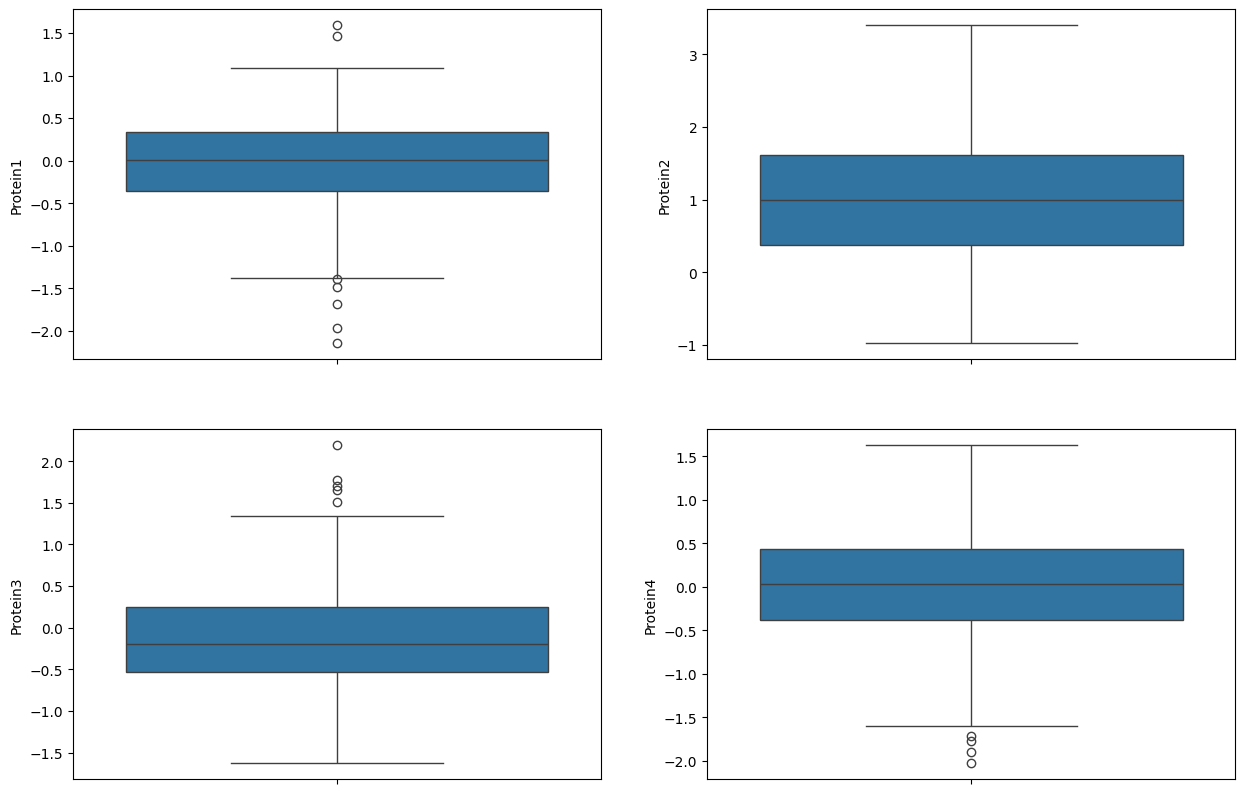

In [356]:
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(y='Protein1', data=df)

plt.subplot(2,2,2)
sns.boxplot( y='Protein2', data=df)

plt.subplot(2,2,3)
sns.boxplot( y='Protein3', data=df)

plt.subplot(2,2,4)
sns.boxplot( y='Protein4', data=df)

In [357]:
outlier_removal_columns = ['Protein1', 'Protein3', 'Protein4']
def outlier_removal(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df = outlier_removal(df, outlier_removal_columns)

<Axes: ylabel='Protein4'>

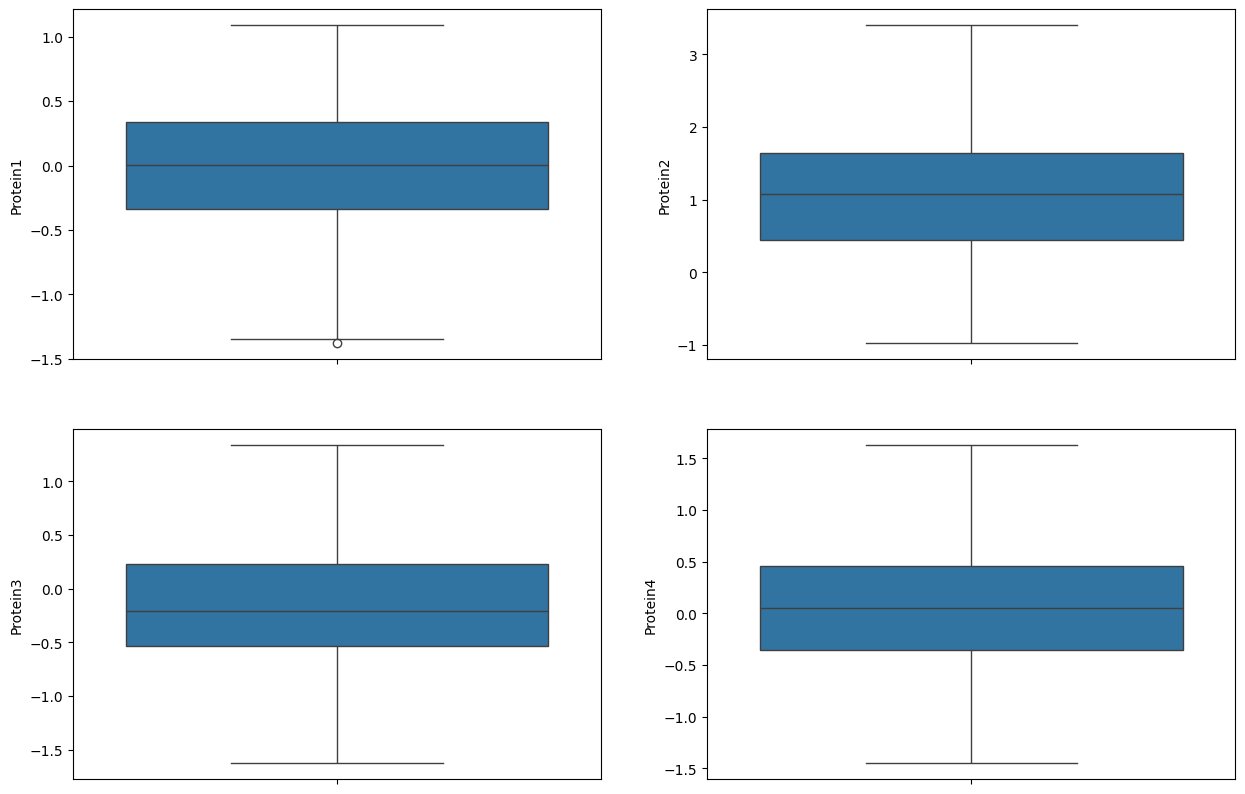

In [358]:
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(y='Protein1', data=df)

plt.subplot(2,2,2)
sns.boxplot( y='Protein2', data=df)

plt.subplot(2,2,3)
sns.boxplot( y='Protein3', data=df)

plt.subplot(2,2,4)
sns.boxplot( y='Protein4', data=df)

<Axes: xlabel='Surgery_type', ylabel='count'>

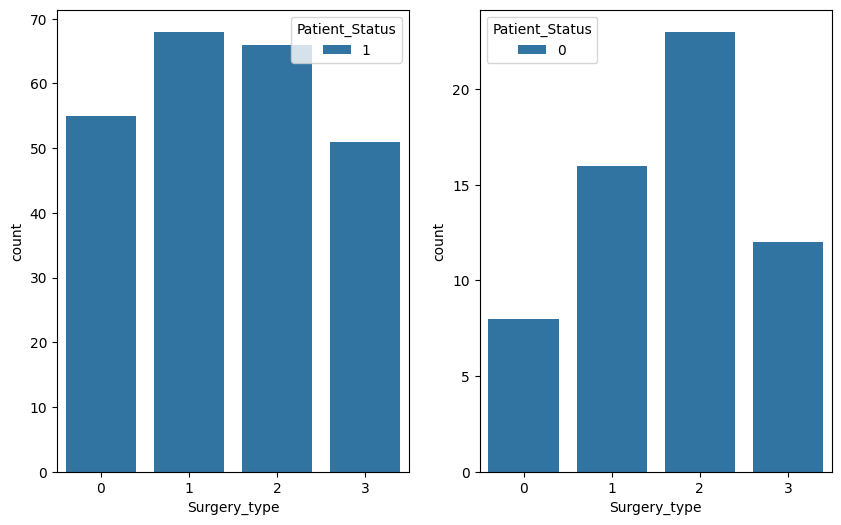

In [359]:
fig = plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.countplot(x='Surgery_type', hue='Patient_Status', data = df[df['Patient_Status'] == 1])

plt.subplot(1,2,2)
sns.countplot(x='Surgery_type', hue='Patient_Status', data = df[df['Patient_Status'] == 0])

In [360]:
group = df.groupby(['Patient_Status', 'Surgery_type']).count()

In [361]:
group_alive = group.loc[1]  # groups all the rows in group having patient status as 1 i.e. Alive
group_dead = group.loc[0]  # groups all the rows in group having patient status as 0 i.e. Dead

ratio = group_alive/group_dead
print(ratio)

                   Age  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
Surgery_type                                                                   
0             6.875000  6.875000  6.875000  6.875000  6.875000      6.875000   
1             4.250000  4.250000  4.250000  4.250000  4.250000      4.250000   
2             2.869565  2.869565  2.869565  2.869565  2.869565      2.869565   
3             4.250000  4.250000  4.250000  4.250000  4.250000      4.250000   

              Histology  ER status  PR status  HER2 status    Sr_Day  \
Surgery_type                                                           
0              6.875000   6.875000   6.875000     6.875000  6.875000   
1              4.250000   4.250000   4.250000     4.250000  4.250000   
2              2.869565   2.869565   2.869565     2.869565  2.869565   
3              4.250000   4.250000   4.250000     4.250000  4.250000   

              Sr_Month   Sr_Year    LV_Day  LV_Month   LV_Year  
Surgery_type         

Survival Ratio:

Other - 6.875

Lumpectomy - 4.25

Modified Radical Masectomy - 2.869565

Simple Masectomy - 4.25

These ratios tell us that undergoing Modified Radical Masectomy has the least chance of survival